In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def study_exp(exp_name):
  with open(f"agents_runs_{exp_name}.json") as f:
    data = json.load(f)
  return data[list(data.keys())[0]]

In [4]:
data = study_exp("eval_all_tmp_6")

In [5]:
scores_per_agent_per_scenarios = []
for k1 in data.keys():
  for k2 in data[k1].keys():
    for k3 in data[k1][k2].keys():
      if "Chron" in k3:
        scores_per_agent_per_scenarios.append(data[k1][k2][k3]["scores"])
scores_per_agent_per_scenarios = np.array(scores_per_agent_per_scenarios)

In [7]:
scores_set_agents = np.load("scores_set_agents.npy")

In [18]:
scores_best_participant = pd.read_csv("score_episodes.csv")["score"][:-1]

In [77]:
min_agents = scores_per_agent_per_scenarios.min(axis=0)
max_agents = scores_per_agent_per_scenarios.max(axis=0)
best_agent = scores_per_agent_per_scenarios[scores_per_agent_per_scenarios.mean(axis=1).argmax()]

mean_agent = scores_set_agents.mean()
mean_best_participant = scores_best_participant.mean()
mean_best_agent = best_agent.mean()

In [78]:
weights = [(scores_per_agent_per_scenarios.argmax(axis=0)==i).sum() for i in range(7)]
weights = np.exp(weights)/sum(np.exp(weights))
weights

array([2.90655860e-04, 8.66432908e-01, 3.93359932e-05, 1.95842378e-06,
       1.17258943e-01, 1.58692723e-02, 1.06926315e-04])

In [79]:
max_agents[0]

47.36296415630977

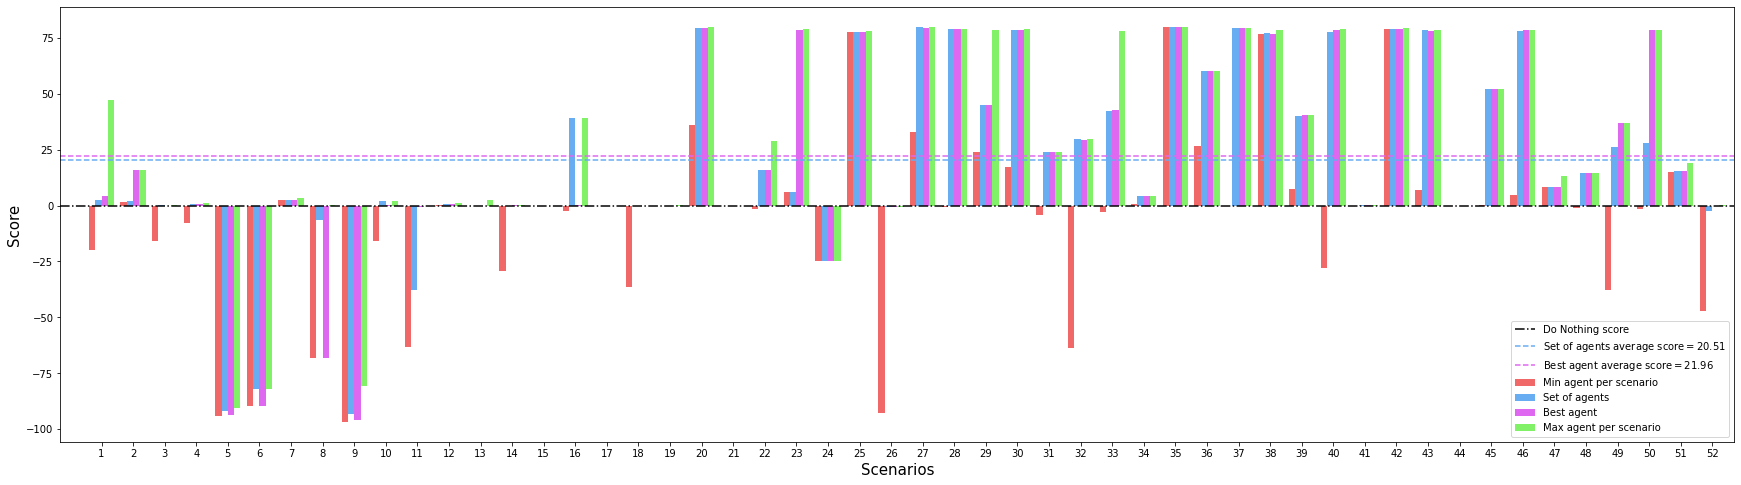

In [82]:
scenarios = np.array(range(1, scores_set_agents.shape[0]+1))
width = 0.2
plt.figure(figsize=(30, 8))
plt.bar(scenarios, min_agents, width, label="Min agent per scenario", color="#f16868")
plt.bar(scenarios+width, scores_set_agents, width, label="Set of agents", color="#68acf1")
plt.bar(scenarios+width*2, best_agent, width, label="Best agent", color="#df68f1")
plt.bar(scenarios+width*3, max_agents, width, label="Max agent per scenario", color="#81f168")
plt.axhline(0, label=f"Do Nothing score", color="black", linestyle='dashdot')
plt.axhline(mean_agent, label=f"Set of agents average score$={mean_agent:.2f}$", linestyle="--", color="#68acf1")
plt.axhline(mean_best_agent, label=f"Best agent average score$={mean_best_agent:.2f}$", linestyle="--", color="#df68f1")
plt.ylabel("Score", fontsize=15)
plt.xlabel("Scenarios", fontsize=15)
plt.xticks(scenarios+1.5*width, scenarios)
plt.xlim((0, scenarios[-1]+1))
_=plt.legend()
plt.savefig("fig_set-agents.pdf")